In [14]:
import numpy as np 
from sklearn.datasets import make_blobs
from numpy.random import uniform, normal
import matplotlib.pyplot as plt

In [22]:
# functions from kdg used to generate xor and rxor

def generate_gaussian_parity(
    n_samples,
    centers=None,
    class_label=None,
    cluster_std=0.25,
    center_box=(-1.0,1.0),
    angle_params=None,
    random_state=None,
):
    """
    Generate 2-dimensional Gaussian XOR distribution.
    (Classic XOR problem but each point is the
    center of a Gaussian blob distribution)
    Parameters
    ----------
    n_samples : int
        Total number of points divided among the four
        clusters with equal probability.
    centers : array of shape [n_centers,2], optional (default=None)
        The coordinates of the ceneter of total n_centers blobs.
    class_label : array of shape [n_centers], optional (default=None)
        class label for each blob.
    cluster_std : float, optional (default=1)
        The standard deviation of the blobs.
    center_box : tuple of float (min, max), default=(-1.0, 1.0)
        The bounding box for each cluster center when centers are generated at random.
    angle_params: float, optional (default=None)
        Number of radians to rotate the distribution by.
    random_state : int, RandomState instance, default=None
        Determines random number generation for dataset creation. Pass an int
        for reproducible output across multiple function calls.
    Returns
    -------
    X : array of shape [n_samples, 2]
        The generated samples.
    y : array of shape [n_samples]
        The integer labels for cluster membership of each sample.
    """

    if random_state != None:
        np.random.seed(random_state)

    if centers == None:
        centers = np.array([(-0.5, 0.5), (0.5, 0.5), (-0.5, -0.5), (0.5, -0.5)])

    if class_label == None:
        class_label = [0, 1, 1, 0]

    blob_num = len(class_label)

    # get the number of samples in each blob with equal probability
    samples_per_blob = np.random.multinomial(
        n_samples, 1 / blob_num * np.ones(blob_num)
    )

    X, y = make_blobs(
        n_samples=samples_per_blob,
        n_features=2,
        centers=centers,
        cluster_std=cluster_std,
        center_box=center_box
    )

    for blob in range(blob_num):
        y[np.where(y == blob)] = class_label[blob]

    if angle_params != None:
        R = _generate_2d_rotation(angle_params)
        X = X @ R

    return X, y.astype(int)

def _generate_2d_rotation(theta=0):
    R = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])

    return R

In [107]:
n_samples = 100
xor = generate_gaussian_parity(n_samples, random_state = 777)
rxor = generate_gaussian_parity(n_samples, angle_params=np.pi/4, random_state = 777)

In [108]:
from hyppo.ksample import KSample
from hyppo.tools import rot_ksamp

stat, pvalue = KSample(indep_test="Dcorr").test(xor[0], rxor[0])

In [109]:
stat, pvalue

(0.002403641841014316, 0.22366059711007466)

In [110]:
angle_sweep = range(0, 360, 1)
stats = np.empty([360,1])
pvals = np.empty([360,1])
for n in angle_sweep:
    rxor = generate_gaussian_parity(n_samples, angle_params=np.radians(n), random_state = 777)
    stats[n], pvals[n] = KSample(indep_test="Dcorr").test(xor[0], rxor[0])

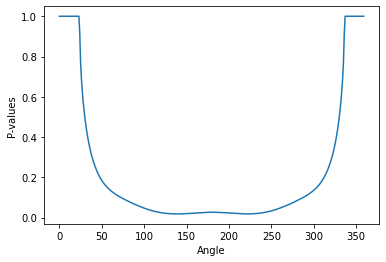

In [111]:
plt.xlabel('Angle')
plt.ylabel('P-values')
plt.plot(angle_sweep, pvals)